# Image GPT Bias Analysis w/ Hugging Face
Ryan Steed

Adapted from https://colab.research.google.com/github/apeguero1/image-gpt/blob/master/Transformers_Image_GPT.ipynb


## Download Model

In [1]:
!nvidia-smi #OpenAI says you need 16GB GPU for the large model, but it may work if you lower n_sub_batch on the others.

zsh:1: command not found: nvidia-smi


In [3]:
!git clone https://github.com/openai/image-gpt.git
!pwd

fatal: destination path 'image-gpt' already exists and is not an empty directory.
/Users/steed/caliskan/git/image-gpt-bias/notebooks


In [1]:
model_sizes = ["s", "m", "l"] #small medium large, xl not available
model_size = "s"
models_dir = "../models"
color_clusters_dir = "../clusters"
n_px = 32

In [7]:
# download the model - skip if already downloaded
!python image-gpt/download.py --model {model_size} --ckpt 1000000 --clusters --download_dir {models_dir}/{model_size}
!python image-gpt/download.py --clusters --download_dir {color_clusters_dir}

input args:
 {
    "download_dir":"../models/s",
    "model":"s",
    "ckpt":"1000000",
    "clusters":true,
    "dataset":null
}
Fetching model.ckpt-1000000.data-00000-of-00032: 1.00kit [00:00, 483kit/s]      
Fetching model.ckpt-1000000.data-00001-of-00032: 31.5Mit [00:00, 41.4Mit/s]     
Fetching model.ckpt-1000000.data-00002-of-00032: 28.3Mit [00:00, 36.2Mit/s]     
Fetching model.ckpt-1000000.data-00003-of-00032: 28.3Mit [00:00, 40.6Mit/s]     
Fetching model.ckpt-1000000.data-00004-of-00032: 28.3Mit [00:01, 20.8Mit/s]     
Fetching model.ckpt-1000000.data-00005-of-00032: 31.5Mit [00:01, 26.3Mit/s]     
Fetching model.ckpt-1000000.data-00006-of-00032: 30.4Mit [00:00, 40.6Mit/s]     
Fetching model.ckpt-1000000.data-00007-of-00032: 28.3Mit [00:03, 8.57Mit/s]     
Fetching model.ckpt-1000000.data-00008-of-00032: 31.5Mit [00:00, 38.1Mit/s]     
Fetching model.ckpt-1000000.data-00009-of-00032: 29.4Mit [00:00, 39.4Mit/s]     
Fetching model.ckpt-1000000.data-00010-of-00032: 31.5Mit [00

## HuggingFace Implementation



In [2]:
from ieat.models import EmbeddingExtractor

extractor = EmbeddingExtractor(
    model_size=model_size,
    models_dir=models_dir,
    color_clusters_dir=color_clusters_dir,
    n_px=n_px
)
extractor

## Embedding Extraction

Prior implementations:
- SENT (w/ jiant) - https://github.com/W4ngatang/sent-bias
- Tan & Celis (w/ HuggingFace) - https://github.com/tanyichern/social-biases-contextualized

### Weapons

In [3]:
tools = ["bottle.jpg", "camera.jpg", "coke.jpg", "icecream.jpg", "phone.jpg", "walkman.jpg", "wallet.jpg"]
weapons = ["axe.jpg", "cannon.jpg", "grenade.jpg", "mace.jpg", "revolver.jpg", "rifle.jpg", "sword.jpg"]
black_people = ["bf14.jpg", "bf23.jpg", "bf56.jpg", "bm14.jpg", "bm23.jpg", "bm56.jpg"]
white_people = ["wf2.jpg", "wf3.jpg", "wf6.jpg", "wm1.jpg", "wm4.jpg", "wm6.jpg"]
image_paths = tools + weapons + black_people + white_people
%cd ../data/weapon

/Users/steed/caliskan/git/image-gpt-bias/data/weapon


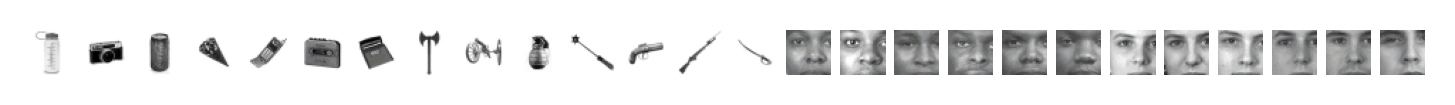

In [5]:
_ = extractor.process_samples(image_paths, visualize=True)

In [ ]:
output_path = "../../embeddings/weapon.csv"
extractor.extract(image_paths, output_path)

In [42]:
# to download from colab
from google.colab import files

files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>